<a href="https://colab.research.google.com/github/zorkideh/MPM_200_Zare/blob/main/MPM_200_new_modified_Zare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [84]:
# Install beepr from CRAN (only needs to be done once)
install.packages("beepr")

# Install other packages if needed
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("sjPlot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
# Load libraries
library(beepr)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(sjPlot)

# Use beep() to make the MARIO sound
beep(sound = "mario")


Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [51]:
data <- read.csv("/content/Hummingbird_data.csv",
                 header = TRUE,
                 stringsAsFactors = FALSE)


**Q2. How many rows and columns are in the datafame**  
1 point

In [52]:
## your code answer here
nrow(data)     # number of rows
ncol(data)     # number of columns


[1] 6908

[1] 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [53]:
str(data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [54]:
# Identify data types of each column
data_types = sapply(data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [55]:
library(dplyr)
model_data = sample_n(data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [56]:

nrow(model_data)
ncol(model_data)


[1] 5000

[1] 12

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [57]:
model_data$Age_e <- as.numeric(model_data$Age_e)
model_data$Brought_in_after <- as.numeric(model_data$Brought_in_after)

Warning message:
“NAs introduced by coercion”


In [58]:
data_types <- sapply(model_data, class)
data_types


Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"          "numeric"          "numeric" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character"

In [59]:
cat_vars <- sum(data_types == "character")
num_vars <- sum(data_types == "numeric")

cat_vars
num_vars



[1] 10

[1] 2

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [60]:
# Save the sampled dataset (model_data) as a CSV file
write.csv(model_data,
          "Hummingbird_data_ORKIDEH.csv",
          row.names = FALSE)


In [61]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [62]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4122
Santa Barbara,65
malibu,813


In [63]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [64]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

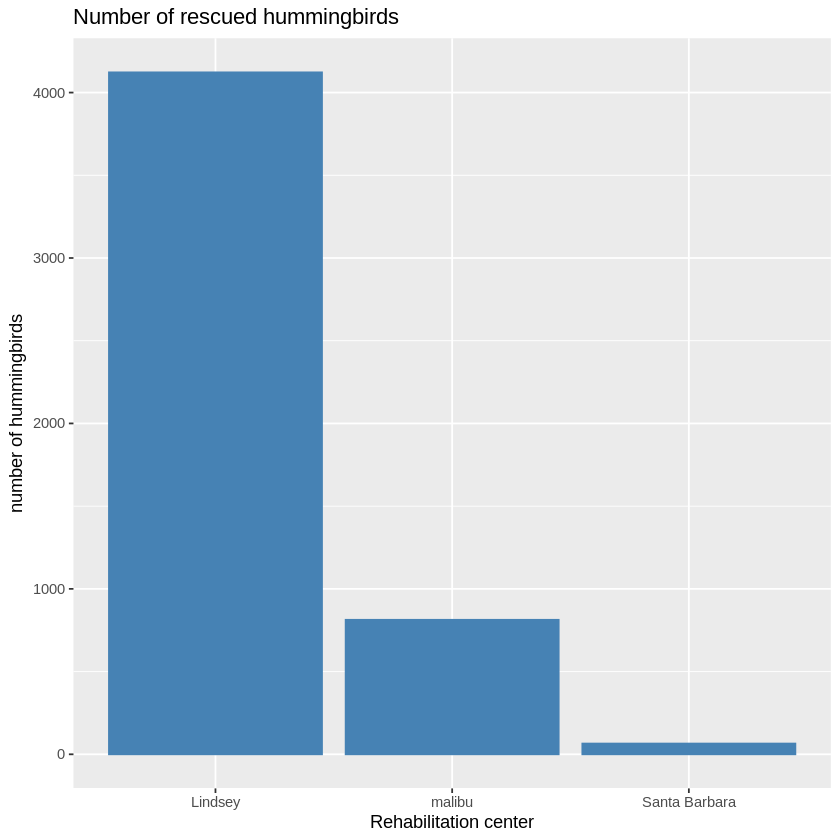

In [65]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [66]:
# Save plot p to a PDF, 4x3 inches
pdf("Hummingbird_plot_ORKIDEH.pdf", width = 4, height = 3)
print(p)
dev.off()


agg_record_790874177 
                   2

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

The code first groups the dataset by rehabilitation center and counts how many unique hummingbirds  were admitted to each center. This summary table is saved as the object rehab. Then, the ggplot code uses this summary table to create a bar plot, where the x-axis shows the rehabilitation centers and the y-axis shows the number of birds. The bar chart is styled with colors and labeled so the results are easy to interpret.

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [67]:
species_df <- model_data %>%
  group_by(Species_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID))
species_df

`summarise()` has grouped output by 'Species_e'. You can override using the
`.groups` argument.


Species_e,Disposition_binary,count
<chr>,<chr>,<int>
ANHU,Died,2285
ANHU,Released,840
BCHU,Died,20
BCHU,Released,15
Non-selasphorus,Died,355
Non-selasphorus,Released,616
Selasphorus,Died,547
Selasphorus,Released,322


In [68]:
df <- model_data %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

df


`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.


Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2333
Female-like,Released,916
Male,Died,436
Male,Released,114
unknown,Died,438
unknown,Released,763


In [69]:
df <- model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

df


`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.


F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2102
No,Released,1199
Yes,Died,1105
Yes,Released,594


In [70]:
df <- model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

df


`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


Place,Disposition_binary,count
<chr>,<chr>,<int>
Lindsey,Died,2668
Lindsey,Released,1454
Santa Barbara,Died,40
Santa Barbara,Released,25
malibu,Died,499
malibu,Released,314


In [71]:
df <- model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

df


`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,387
Fall,Released,59
Spring,Died,1332
Spring,Released,967
Summer,Died,923
Summer,Released,586
Winter,Died,565
Winter,Released,181


In [72]:
df

season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,387
Fall,Released,59
Spring,Died,1332
Spring,Released,967
Summer,Died,923
Summer,Released,586
Winter,Died,565
Winter,Released,181


In [73]:
df <- model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID))


`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


In [74]:
p <- ggplot(df, aes(x = season, y = count, fill = Disposition_binary)) +
  geom_col() +
  facet_grid(. ~ Disposition_binary) +
  xlab("Season") +
  ylab("Number of hummingbirds") +
  labs(title = "Survival by Season")


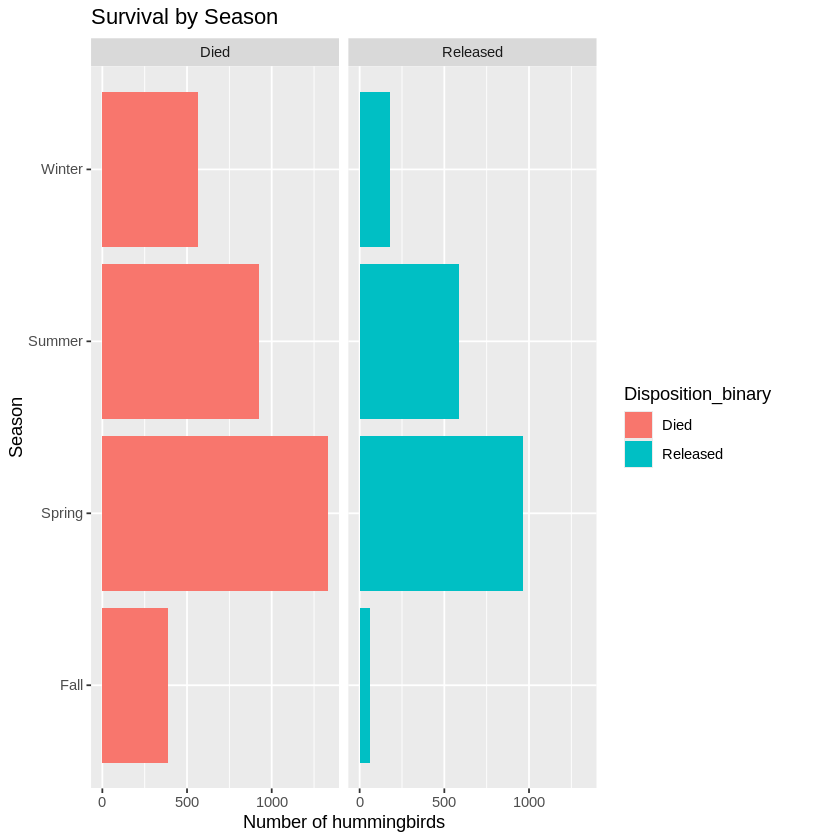

In [75]:
p + facet_grid(. ~ Disposition_binary)+ coord_flip()

`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.


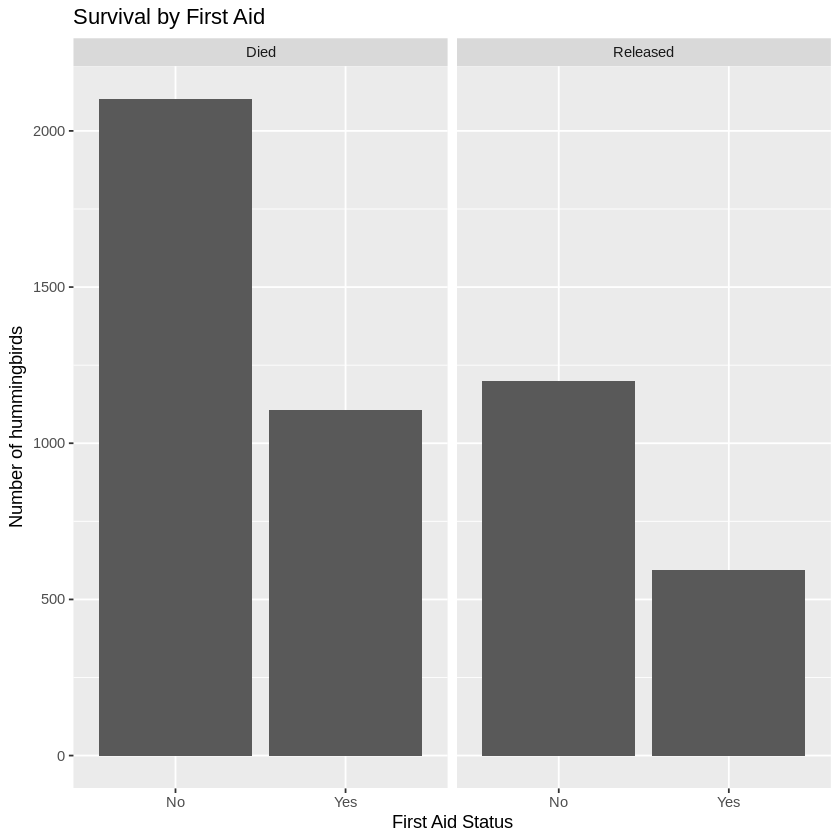

In [76]:
df4 <- model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

p4 <- ggplot(df4, aes(x = count, y = F_Aid)) +
  geom_col() +
  facet_grid(. ~ Disposition_binary) +
  xlab("Number of hummingbirds") +
  ylab("First Aid Status") +
  labs(title = "Survival by First Aid") +
  coord_flip()

p4


`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


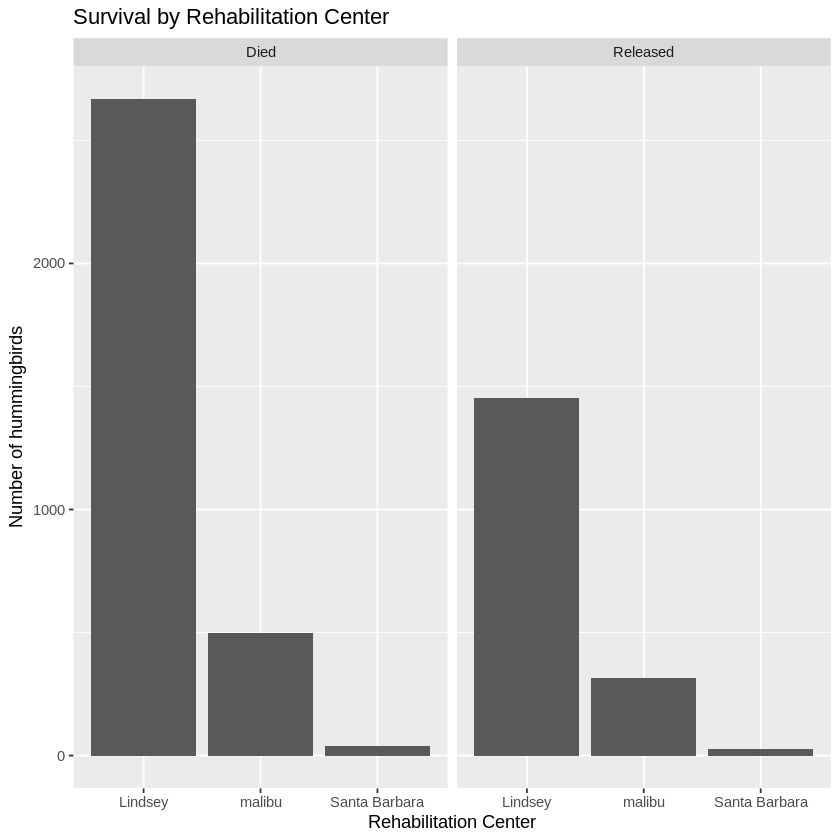

In [77]:
df3 <- model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

p3 <- ggplot(df3, aes(x = count, y = Place)) +
  geom_col() +
  facet_grid(. ~ Disposition_binary) +
  xlab("Number of hummingbirds") +
  ylab("Rehabilitation Center") +
  labs(title = "Survival by Rehabilitation Center") +
  coord_flip()

p3


`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.


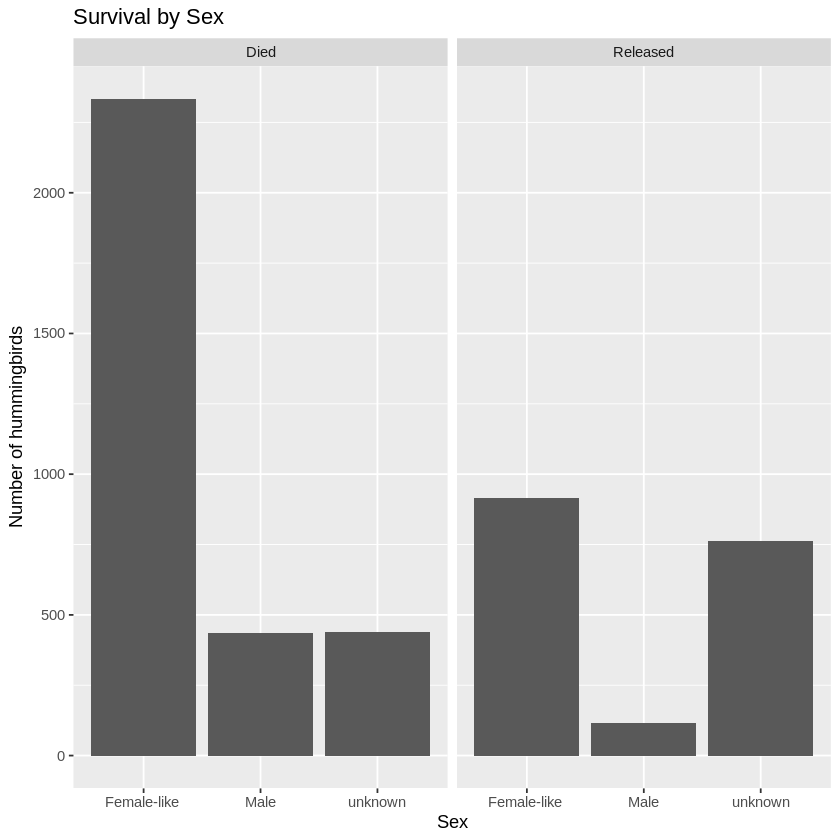

In [78]:
df2 <- model_data %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

p2 <- ggplot(df2, aes(x = count, y = Sex_e)) +
  geom_col() +
  facet_grid(. ~ Disposition_binary) +
  xlab("Number of hummingbirds") +
  ylab("Sex") +
  labs(title = "Survival by Sex") +
  coord_flip()

p2


`summarise()` has grouped output by 'Species_e'. You can override using the
`.groups` argument.


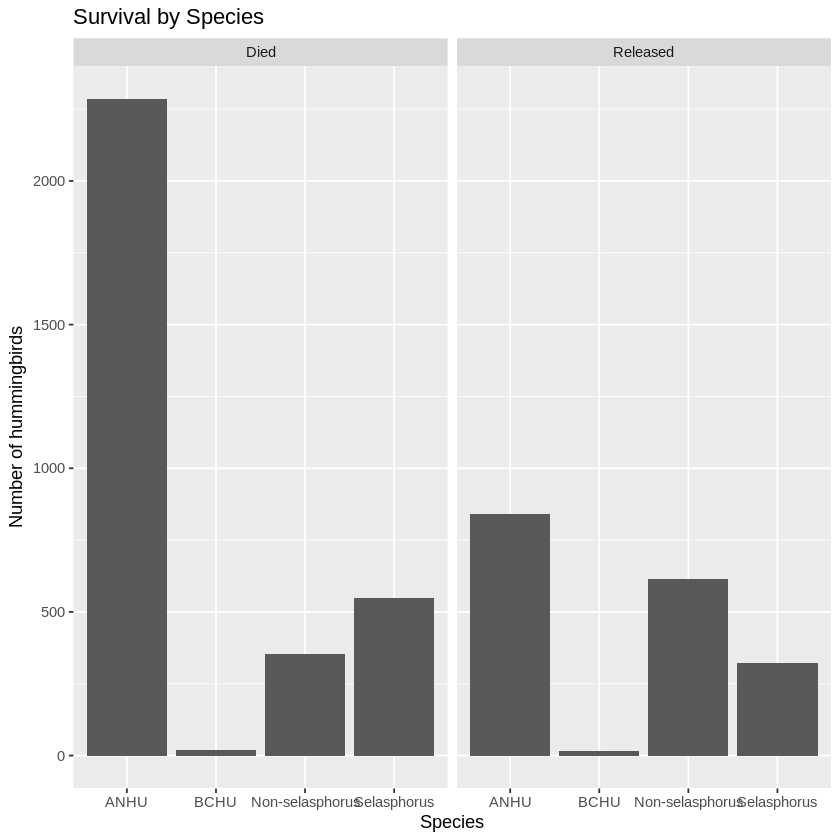

In [79]:
df1 <- model_data %>%
  group_by(Species_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

p1 <- ggplot(df1, aes(x = count, y = Species_e)) +
  geom_col() +
  facet_grid(. ~ Disposition_binary) +
  xlab("Number of hummingbirds") +
  ylab("Species") +
  labs(title = "Survival by Species") +
  coord_flip()

p1


Based on the five tables and bar plots, several covariates appear to be related to hummingbird survival. I observed clear differences in the proportion of birds that were released versus died across species, sex, rehabilitation center, first-aid status, and season.
For example, some species showed higher release rates, while Selasphorus had more deaths. Seasonal patterns also appeared, with more deaths during certain seasons than others.
To statistically test these relationships,  I would use a multivariable logistic regression model with survival as the outcome and all covariates included together. This would help identify which variables remain significant after adjusting for the others and determine which factors most strongly predict survival.

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2668,0.6472586
Lindsey,Released,1454,0.3527414
Santa Barbara,Died,40,0.6153846
Santa Barbara,Released,25,0.3846154
malibu,Died,499,0.6137761
malibu,Released,314,0.3862239


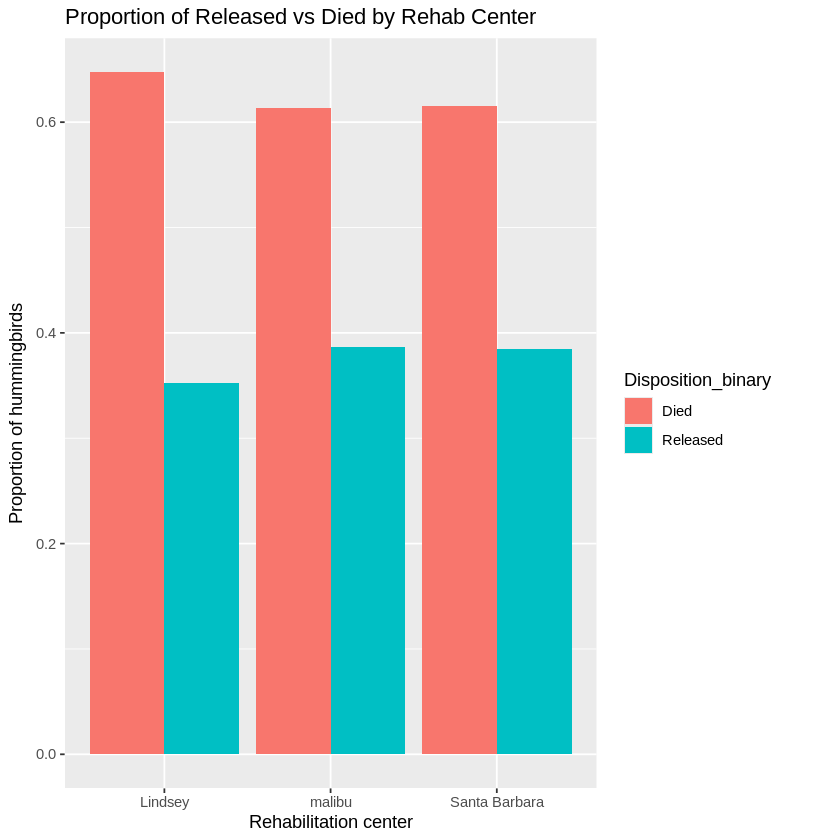

In [80]:
proportions <- model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop") %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation center") +
  ylab("Proportion of hummingbirds") +
  labs(title = "Proportion of Released vs Died by Rehab Center")


### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


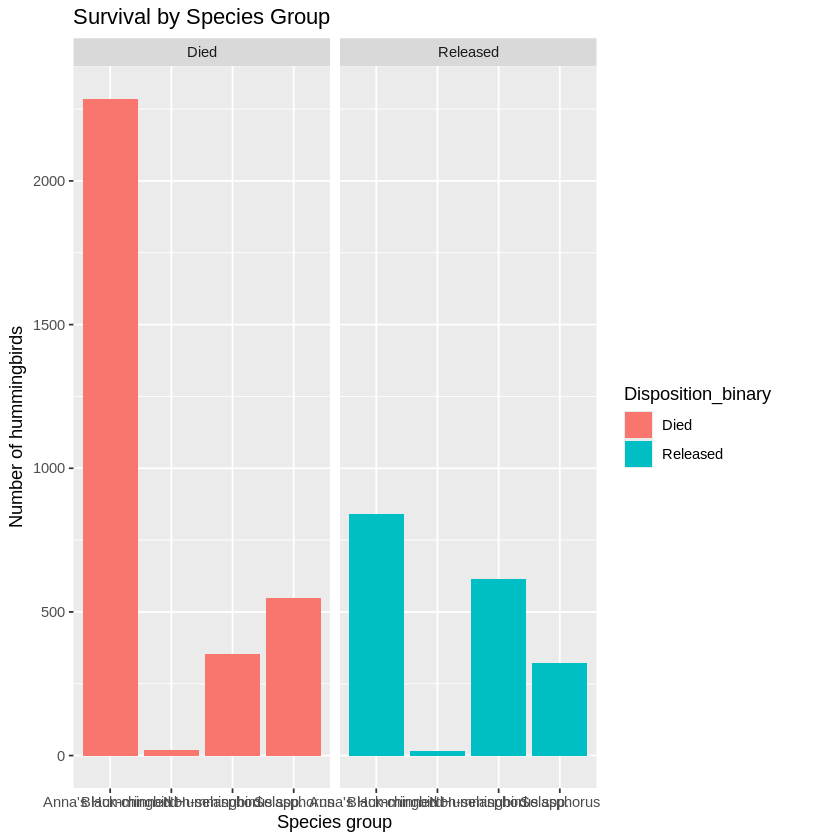

In [103]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?
model_data$Species_group <- ifelse(
  model_data$Species_e %in% "ANHU", "Anna's Hummingbird",
  ifelse(model_data$Species_e %in% "BCHU", "Black-chinned Hummingbird",
         ifelse(model_data$Species_e %in% "Selasphorus", "Selasphorus",
                "Non-selasphorus spp.")
  )
)
# Tabulate and plot the distribution
species_distribution <- model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))
ggplot(species_distribution,
       aes(x = count, y = Species_group, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ Disposition_binary) +
  xlab("Number of hummingbirds") +
  ylab("Species group") +
  labs(title = "Survival by Species Group") +
  coord_flip()

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [95]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [96]:
admissions_by_month <- model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))
admissions_by_year <- model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))


Finally, we can use `ggplot` to plot these timelines.

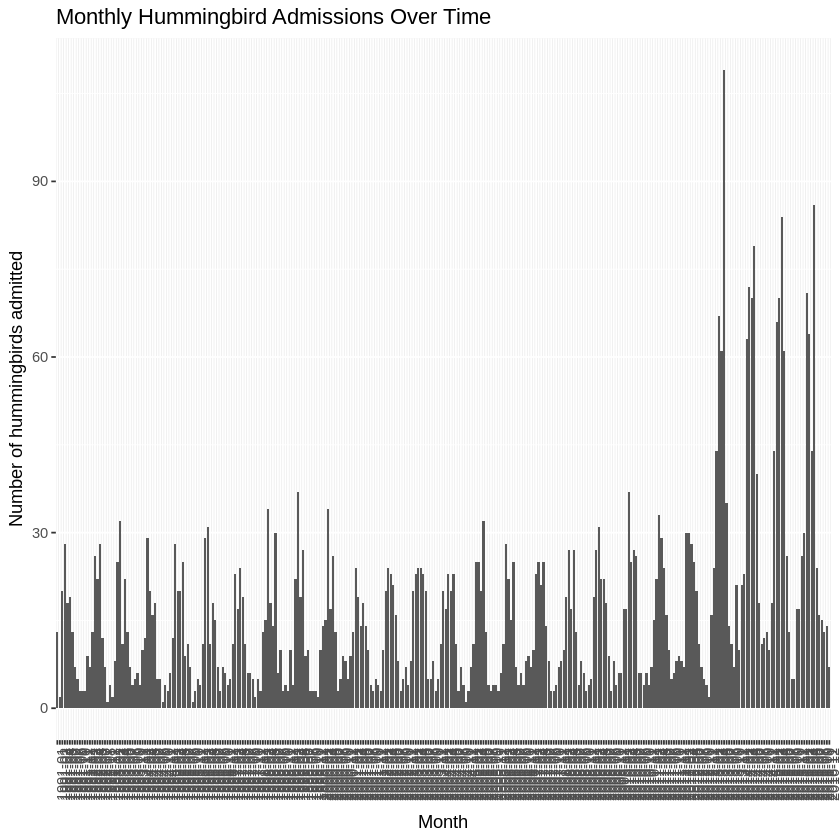

In [97]:
# Plot admissions by month
p_month <- ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Month") +
  ylab("Number of hummingbirds admitted") +
  labs(title = "Monthly Hummingbird Admissions Over Time") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

p_month


In [99]:
## Plot similar timeline for Yearly admissions of Hummingbirds

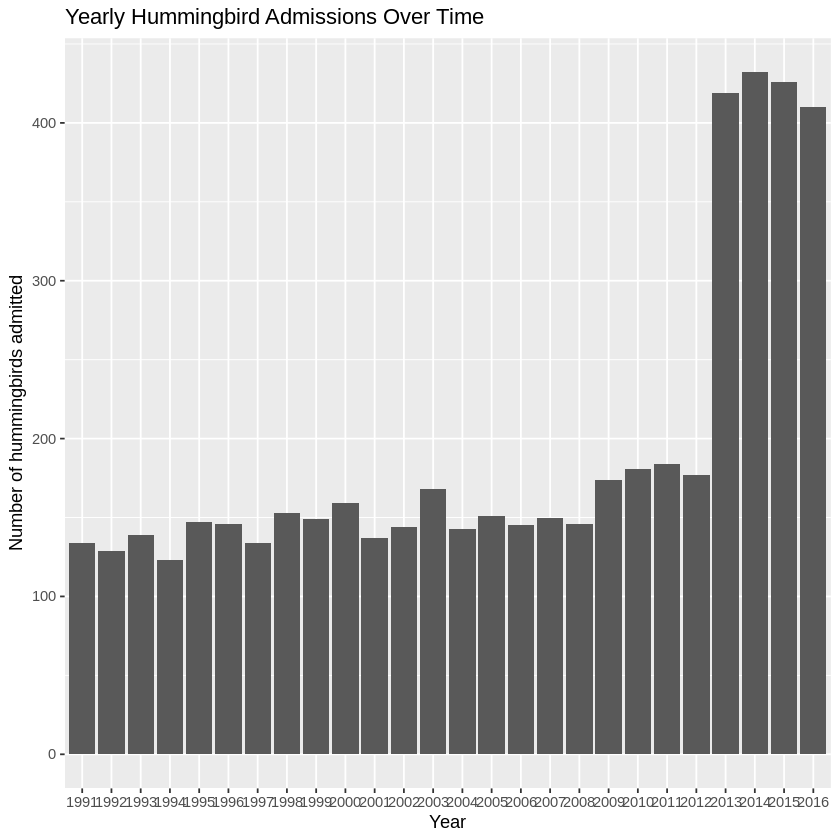

In [100]:
p_year <- ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Year") +
  ylab("Number of hummingbirds admitted") +
  labs(title = "Yearly Hummingbird Admissions Over Time")

p_year


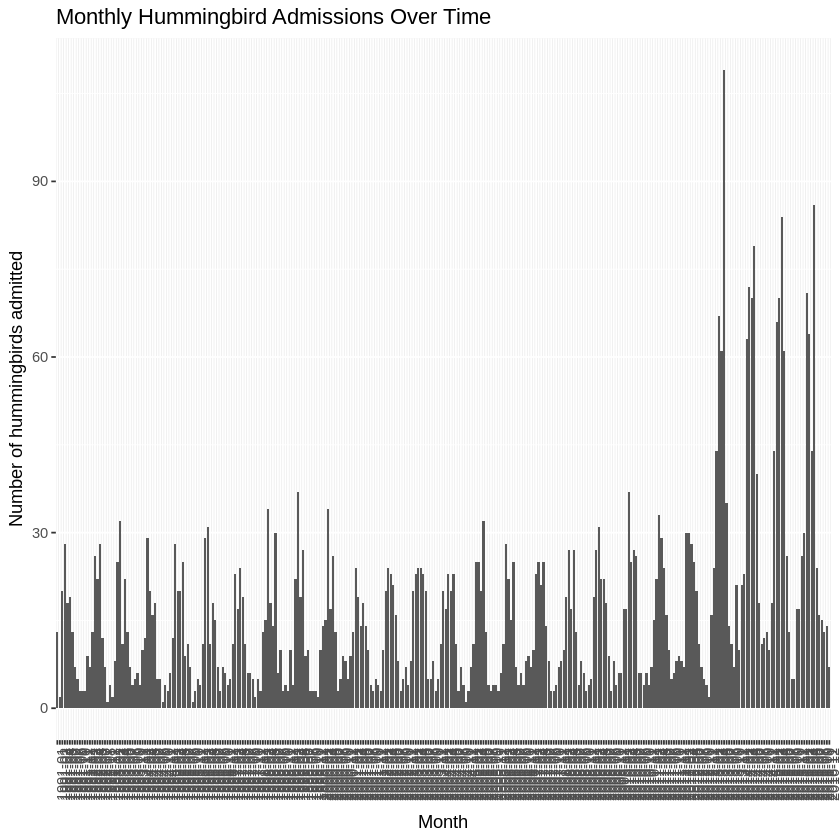

In [102]:
# Plot admissions by month
p_month <- ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Month") +
  ylab("Number of hummingbirds admitted") +
  labs(title = "Monthly Hummingbird Admissions Over Time") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

p_month

In [108]:
model_data$Disposition_numeric = ifelse(model_data$Disposition_binary == "Released", 1, 0)
fullmodel = glm(Disposition_numeric ~ r + Green_Orange + season + F_Aid + Species_e, data = model_data, family= binomial(link = "logit"))
fullmodel
backward_model = step(fullmodel,k=2,direction = "backward",test="Chisq")
forward_model = step(fullmodel,k=2,direction = "forward",test="Chisq")


Call:  glm(formula = Disposition_numeric ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                    -2.02860                       0.23108  
        rfound on the ground                 rnest-related  
                     0.18594                       0.74993  
  rsuspect torpor-like state                      runknown  
                    -1.01186                       0.44529  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                     0.01012                       0.18350  
                seasonSpring                  seasonSummer  
                     1.13352                       1.03231  
                seasonWinter                      F_AidYes  
                     0.51749                      -0.08576  
               Species_eBCHU      Species_eNon-selasphorus  
                     0.55592              

Start:  AIC=5956.49
Disposition_numeric ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5956.49
Disposition_numeric ~ r + season + F_Aid + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
- F_Aid      1   5930.1 5956.1   1.637    0.2008    
<none>           5928.5 5956.5                      
- r          6   5995.4 6011.4  66.885 1.777e-12 ***
- season     3   6023.0 6045.0  94.554 < 2.2e-16 ***
- Species_e  3   6098.1 6120.1 169.571 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step:  AIC=5956.12
Disposition_numeric ~ r + season + Species_e

            Df Deviance    AIC     LRT  Pr(>Chi)    
<none>           5930.1 5956.1                      
- r          6   5997.4 6011.4  67.254 1.494e-12 ***
- season     3   6024.5 6044.5  94.355 < 2.2e-16 ***
- Species_e  3   6100.2 6120.2 170.099 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Start:  AIC=5956.49
Disposition_numeric ~ r + Green_Or

In [109]:
!!!Answer Questions in the Assignment
Section 5: explore the glm object

names(backward_model)

explore individual attributes of the fitted model and read about it in the R documentation


library(sjPlot)


tab_model(backward_model)

ERROR: Error in parse(text = input): <text>:1:11: unexpected symbol
1: !!!Answer Questions
              ^


In [110]:

names(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

In [111]:

library(sjPlot)

tab_model(backward_model)

In [113]:
summary(fullmodel)


Call:
glm(formula = Disposition_numeric ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients: (1 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -2.02860    0.16289 -12.454  < 2e-16 ***
rfound inside                 0.23108    0.20303   1.138 0.255042    
rfound on the ground          0.18594    0.10384   1.791 0.073356 .  
rnest-related                 0.74993    0.12989   5.774 7.75e-09 ***
rsuspect torpor-like state   -1.01186    0.34739  -2.913 0.003583 ** 
runknown                      0.44529    0.11985   3.715 0.000203 ***
rwindow hit                   0.01012    0.14377   0.070 0.943877    
Green_OrangeSelasphorus spp.  0.18350    0.08679   2.114 0.034499 *  
seasonSpring                  1.13352    0.14961   7.576 3.55e-14 ***
seasonSummer                  1.03231    0.15315   6.740 1.58e-11 ***
seasonWinter             

Q1: How many model properties are available? 31

Q2: Which variable has the highest odds ratio for survival? SeasonSpring

Q3: Do the calculated odds ratios match the values provided by sjPlot? yes